In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\abhin\OneDrive\Desktop\FSDS CLASS\AUGUST\2 AUGUST\1st, 2nd, 4th- ENSAMBLE LEARNING\CUSTOMER CHURN\Customer_churn_project\Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for col in data.columns:
    print("column:{}-Unique Values:{}".format(col,data[col].unique()))

column:customerID-Unique Values:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column:gender-Unique Values:['Female' 'Male']
column:SeniorCitizen-Unique Values:[0 1]
column:Partner-Unique Values:['Yes' 'No']
column:Dependents-Unique Values:['No' 'Yes']
column:tenure-Unique Values:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column:PhoneService-Unique Values:['No' 'Yes']
column:MultipleLines-Unique Values:['No phone service' 'No' 'Yes']
column:InternetService-Unique Values:['DSL' 'Fiber optic' 'No']
column:OnlineSecurity-Unique Values:['No' 'Yes' 'No internet service']
column:OnlineBackup-Unique Values:['Yes' 'No' 'No internet service']
column:DeviceProtection-Unique Values:['No' 'Yes' 'No internet service']
column:TechSupport-Unique Values:['No' 'Yes' 'No internet service'

In [7]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


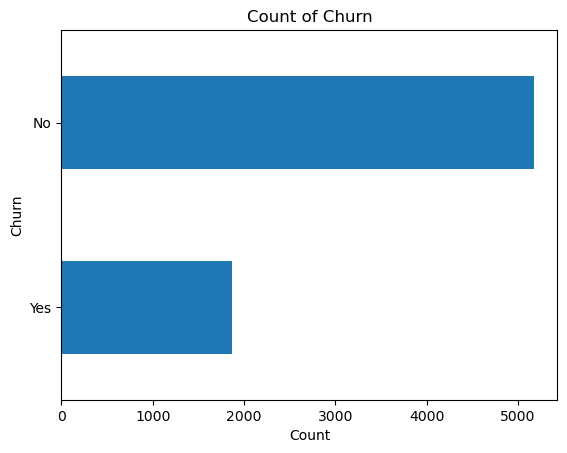

In [11]:
data['Churn'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Churn')
plt.title("Count of Churn")
plt.gca().invert_yaxis()
plt.show()

In [12]:
data['Churn'].value_counts()/len(data)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [13]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
telco_data=data.copy()

In [16]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco_data.loc[telco_data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
telco_data.isna().sum()/len(telco_data)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [20]:
telco_data.dropna(how='any',inplace=True)

In [21]:
print(telco_data['tenure'].max())

72


In [22]:
bins=[0,12,24,36,48,60,72]
labels=['1-12','13-24','25-36','37-48','49-60','61-72']
telco_data['tenure_group']=pd.cut(telco_data['tenure'],bins=bins,labels=labels,right=False)

In [23]:
telco_data['tenure_group'].value_counts()

tenure_group
1-12     2058
61-72    1121
13-24    1047
25-36     876
49-60     820
37-48     748
Name: count, dtype: int64

In [24]:
telco_data['tenure_group'].value_counts()/len(telco_data)

tenure_group
1-12     0.292662
61-72    0.159414
13-24    0.148891
25-36    0.124573
49-60    0.116610
37-48    0.106371
Name: count, dtype: float64

In [25]:
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


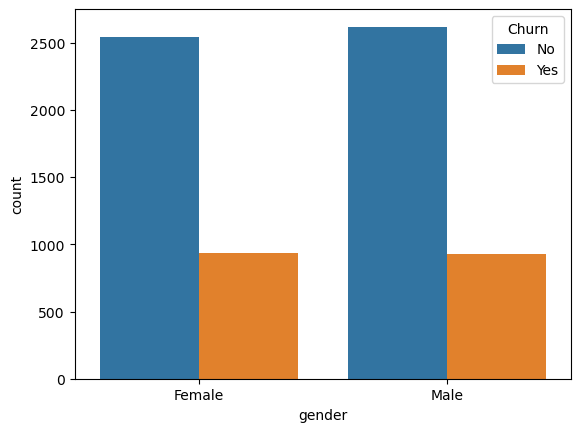

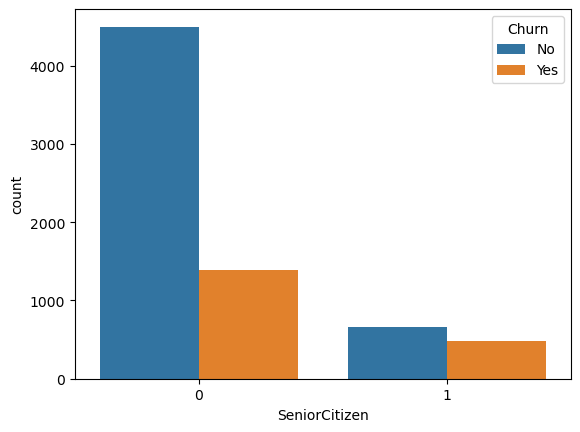

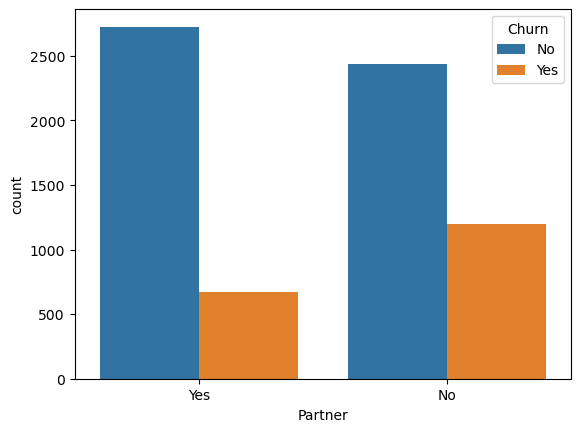

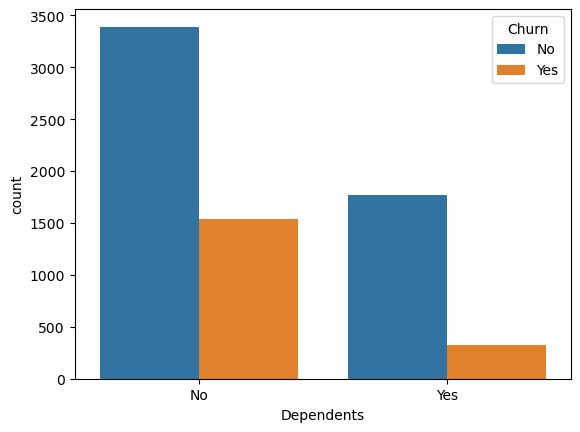

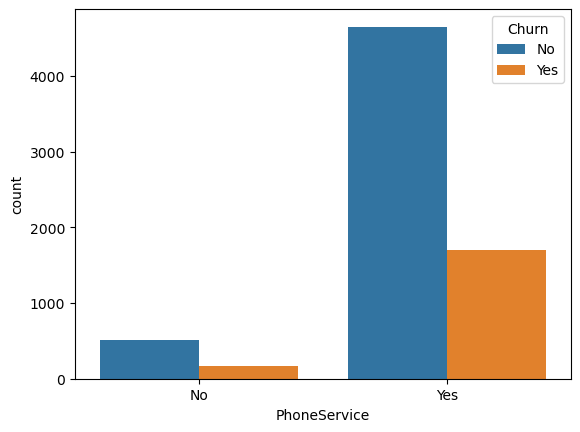

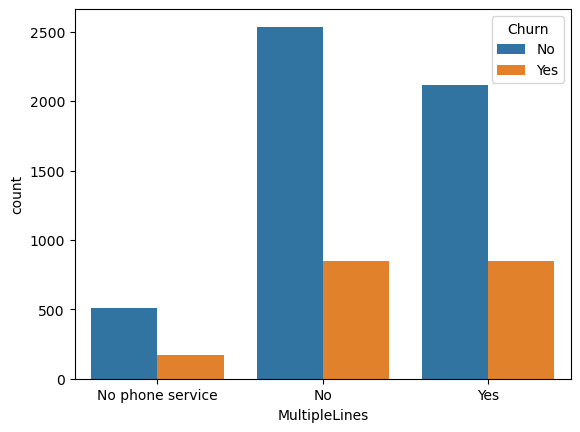

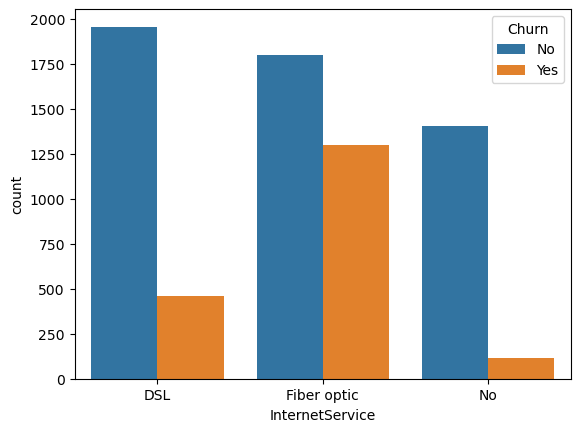

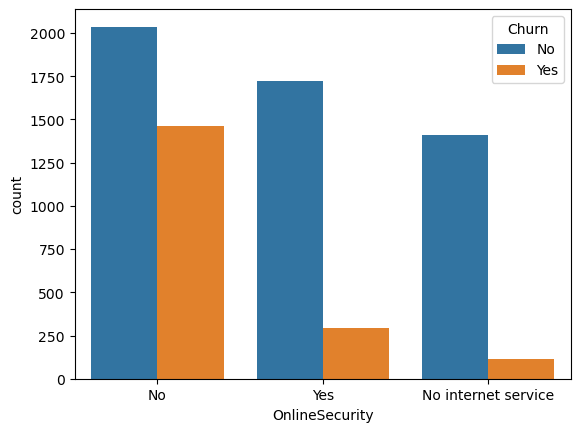

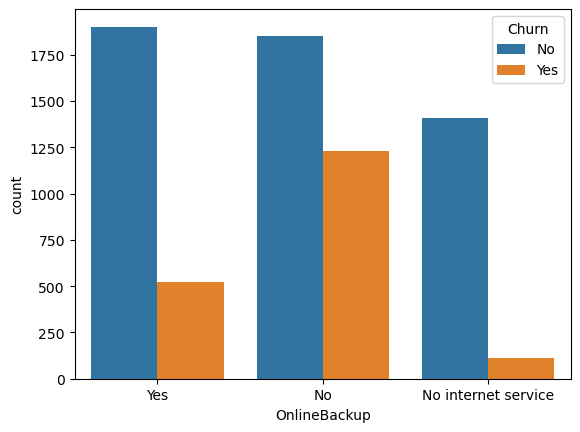

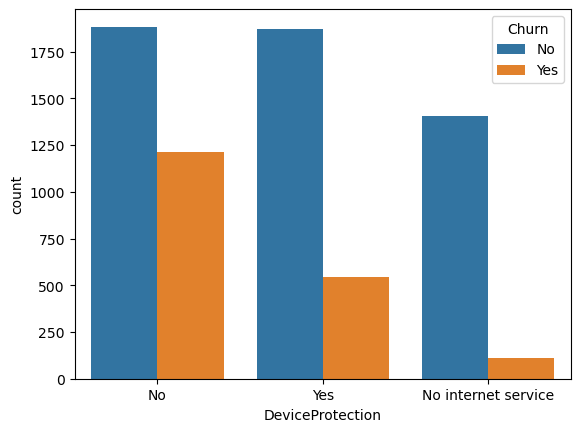

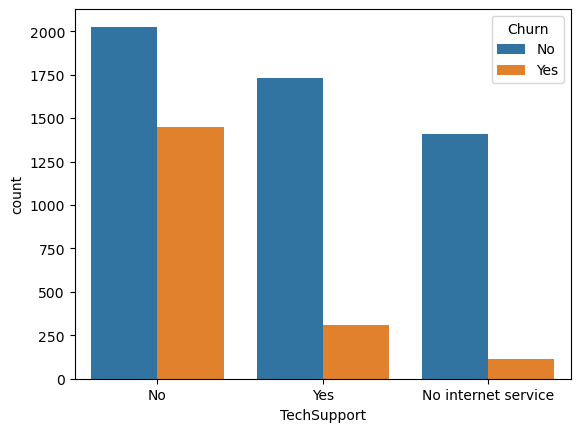

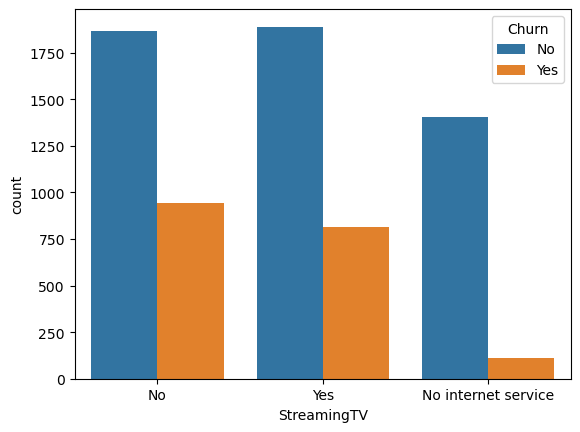

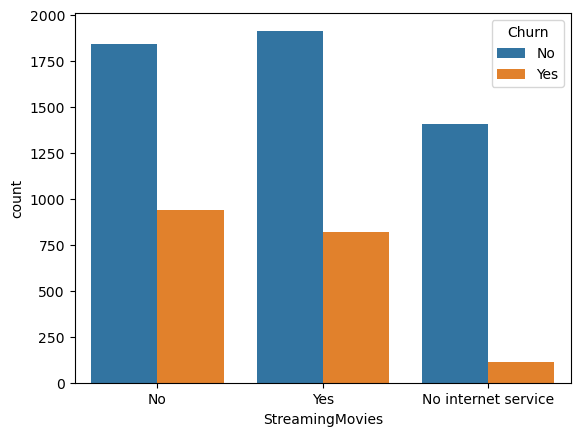

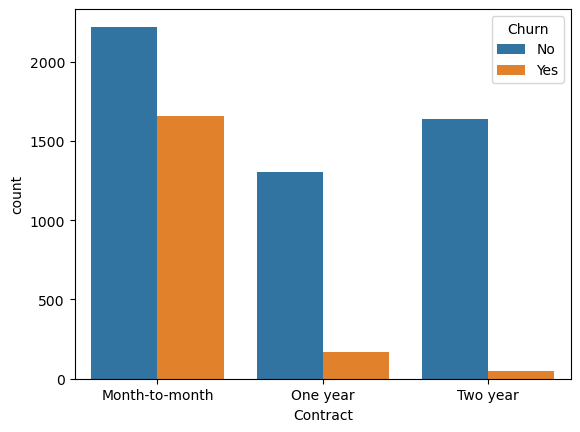

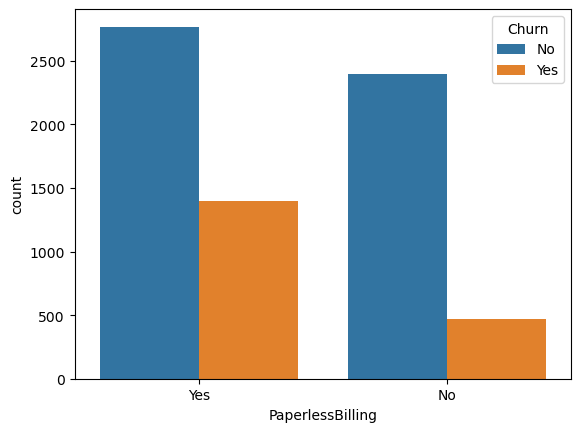

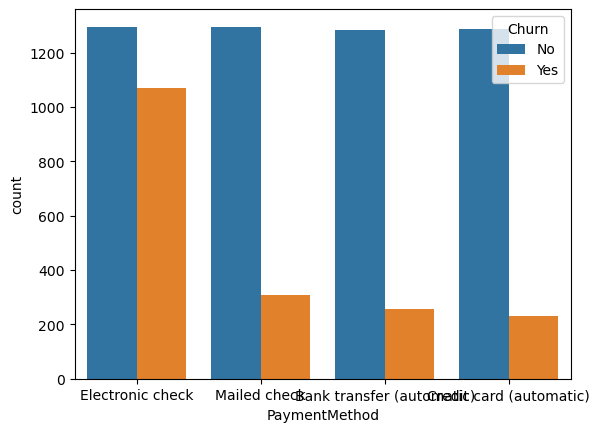

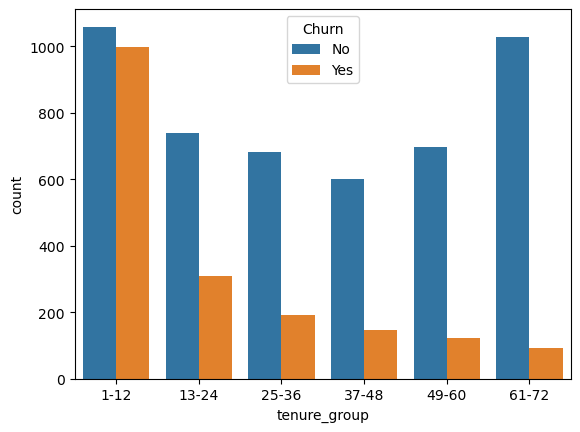

In [26]:
for i,predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor,hue='Churn')
    plt.show()

In [27]:
telco_data['Churn']=np.where(telco_data.Churn=='Yes',1.0,0.0)

In [28]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2460,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,883.35,0.0,49-60
3492,Female,0,No,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.20,98.50,0.0,1-12
2855,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,867.30,0.0,37-48


In [29]:
telco_data.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                float64
tenure_group        category
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [31]:
categ=['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

telco_data[categ] = telco_data[categ].apply(le.fit_transform)

In [32]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6802,0,0,0,0,1,2,1,2,0,0,0,2,0,0,1,0,89.10,1879.25,0,1
4592,0,0,1,1,1,2,2,1,1,1,1,1,1,1,1,3,24.20,914.60,0,3
42,0,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,20.75,418.25,0,1


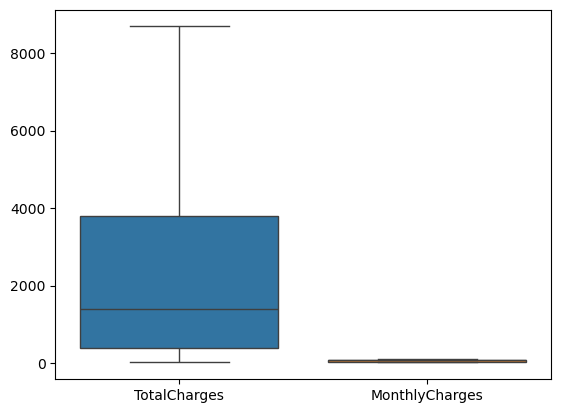

In [33]:
sns.boxplot(data=telco_data[['TotalCharges','MonthlyCharges']])
plt.show()

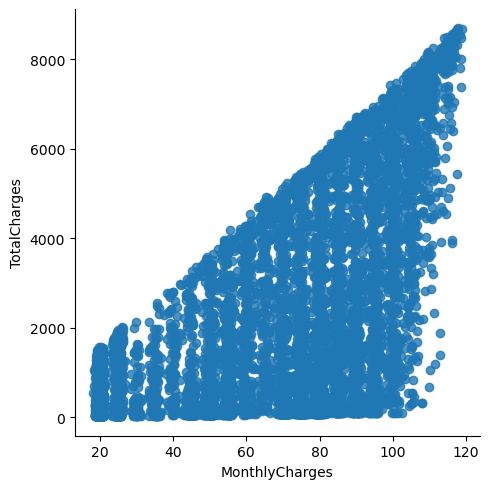

In [34]:
sns.lmplot(data=telco_data,x='MonthlyCharges',y='TotalCharges',fit_reg=False)
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_15172\307414853.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"]==0)],color='Red',shade=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_15172\307414853.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth=sns.kdeplot(telco_data.MonthlyCharges[telco_data['Churn']==1],color='blue',ax=mth,shade=True)


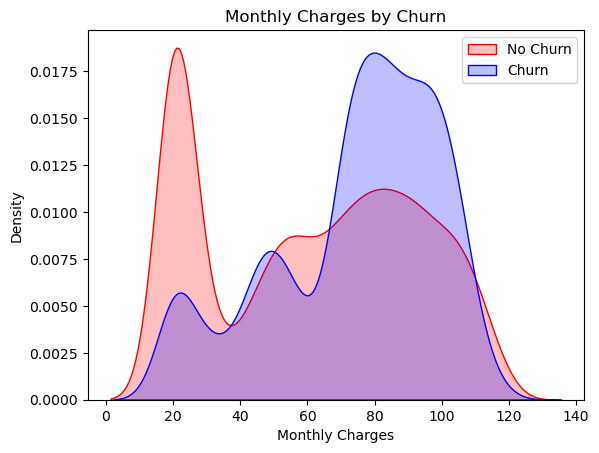

In [35]:
mth=sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"]==0)],color='Red',shade=True)
mth=sns.kdeplot(telco_data.MonthlyCharges[telco_data['Churn']==1],color='blue',ax=mth,shade=True)
mth.legend(['No Churn','Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly Charges by Churn')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_15172\3697682149.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']==0)],color='red',shade=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_15172\3697682149.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']==1)],ax=tot,color='blue',shade=True)


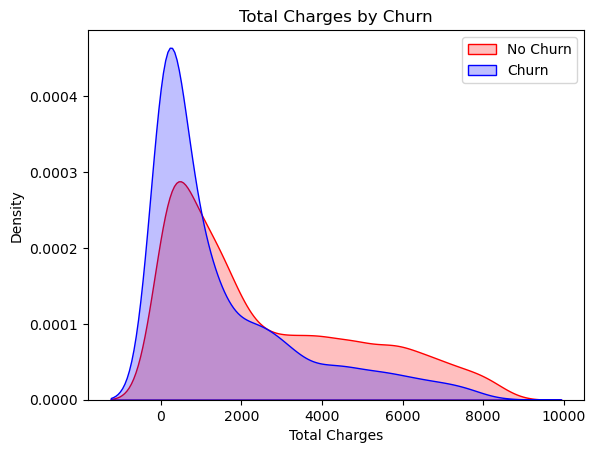

In [36]:
tot=sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']==0)],color='red',shade=True)
tot=sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']==1)],ax=tot,color='blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total Charges by Churn')
plt.show()

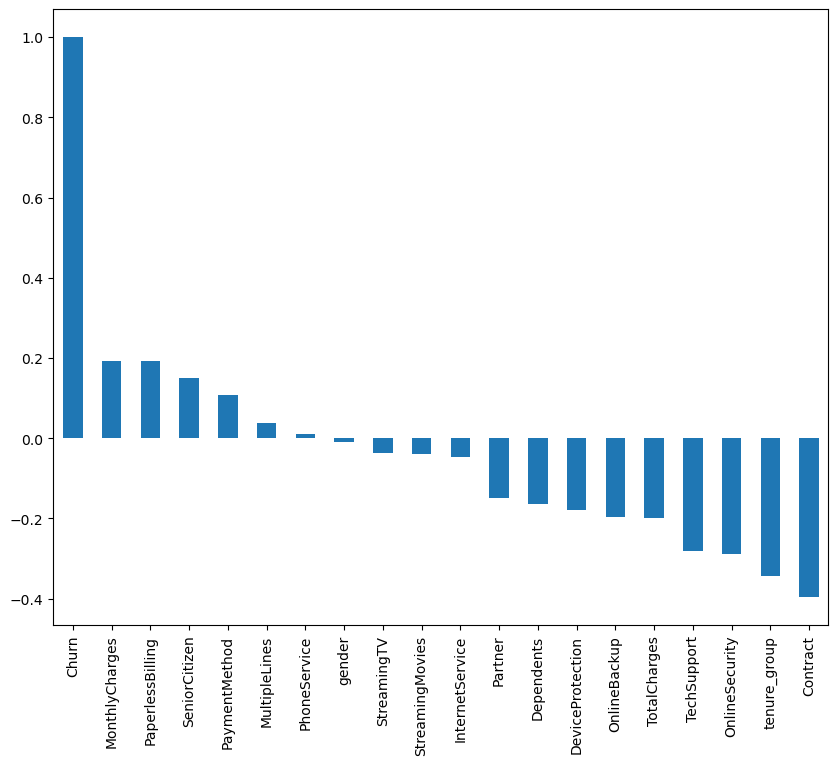

In [37]:
plt.figure(figsize=(10,8))
telco_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

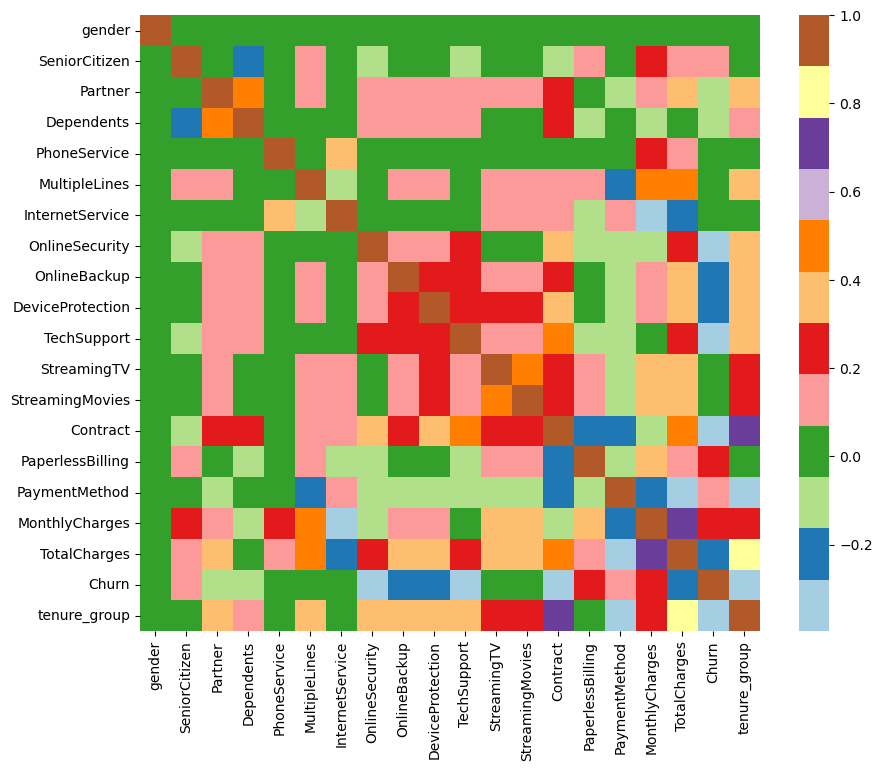

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(telco_data.corr(),cmap='Paired')
plt.show()

In [39]:
new_df1_target0=telco_data.loc[telco_data['Churn']==0]
new_df1_target1=telco_data.loc[telco_data['Churn']==1]

In [40]:
def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

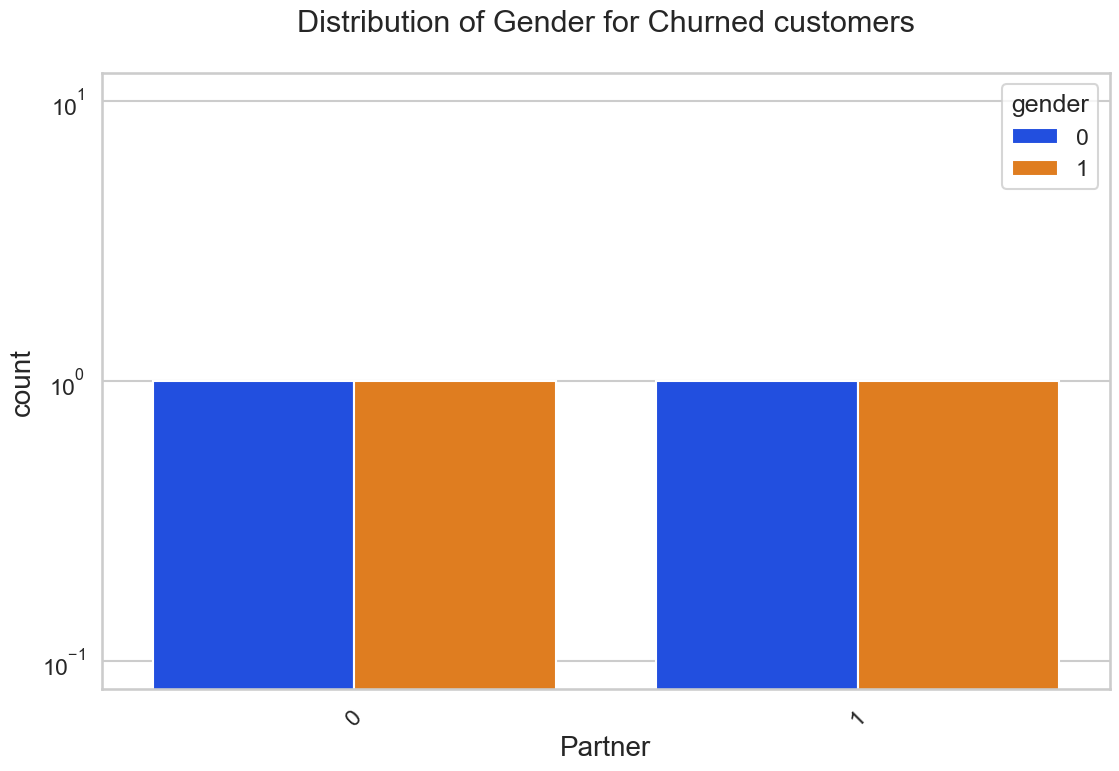

In [41]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned customers',hue='gender')

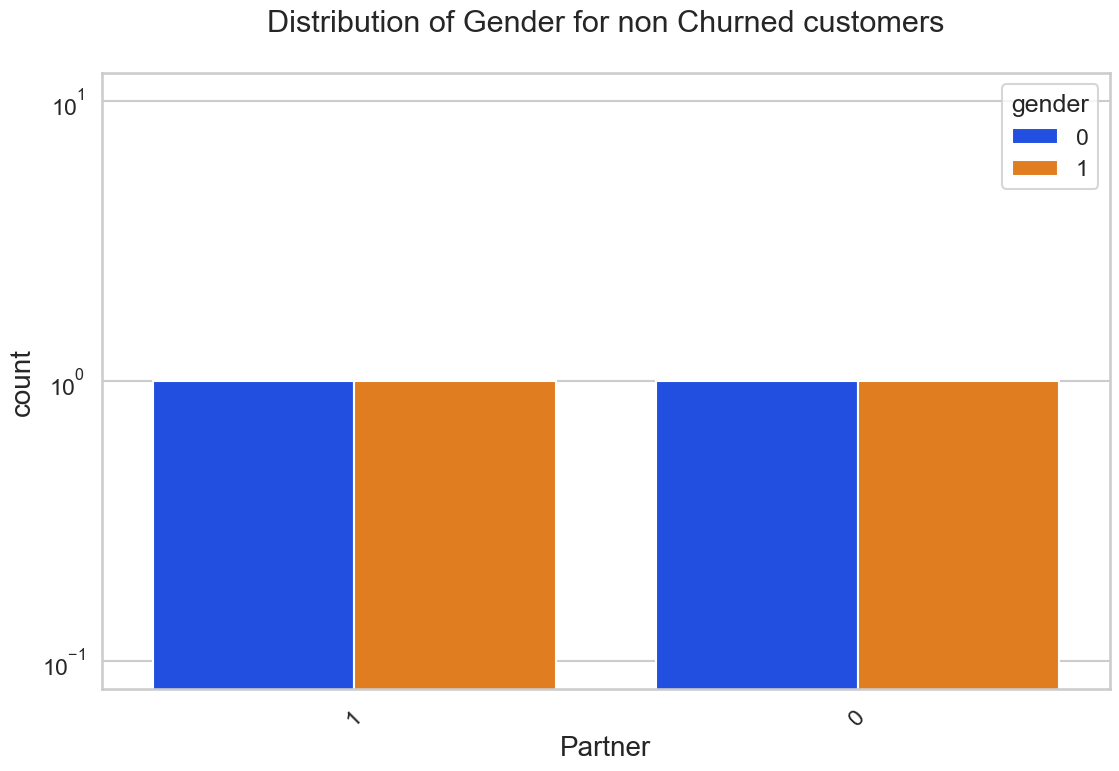

In [42]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for non Churned customers',hue='gender')

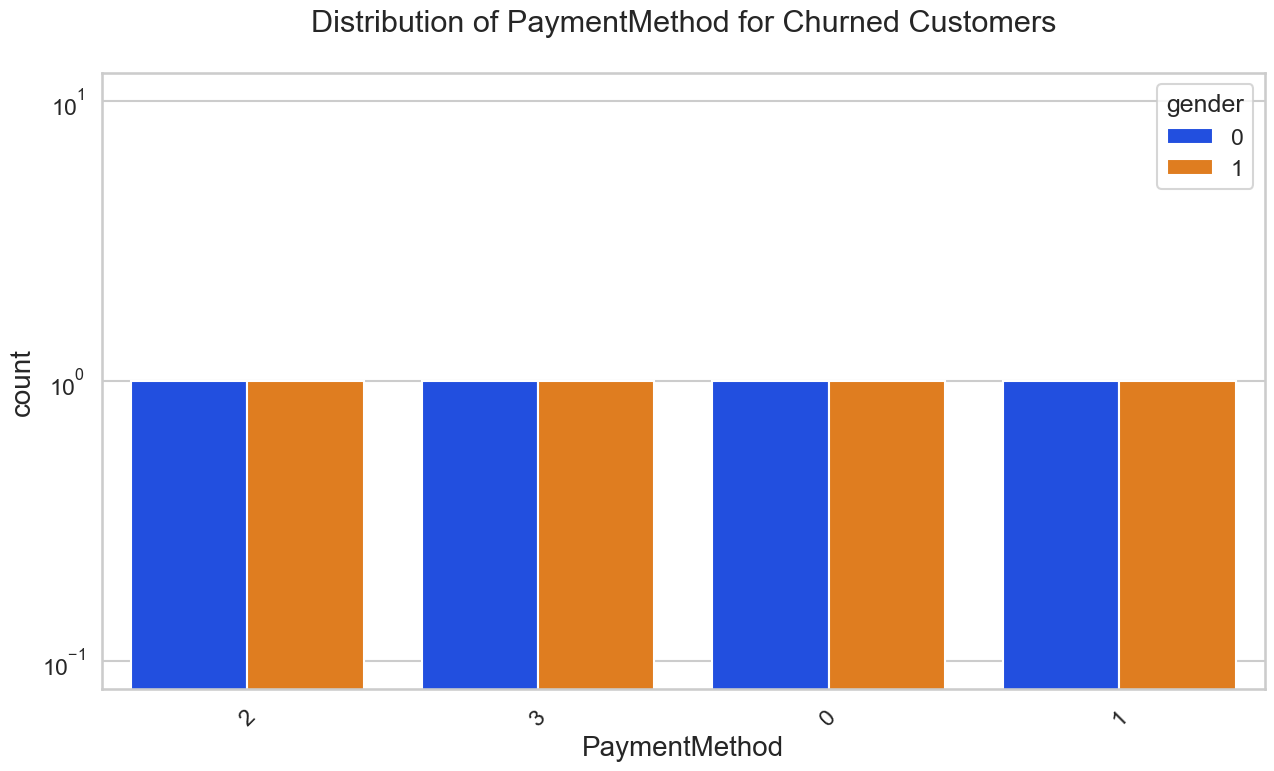

In [43]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

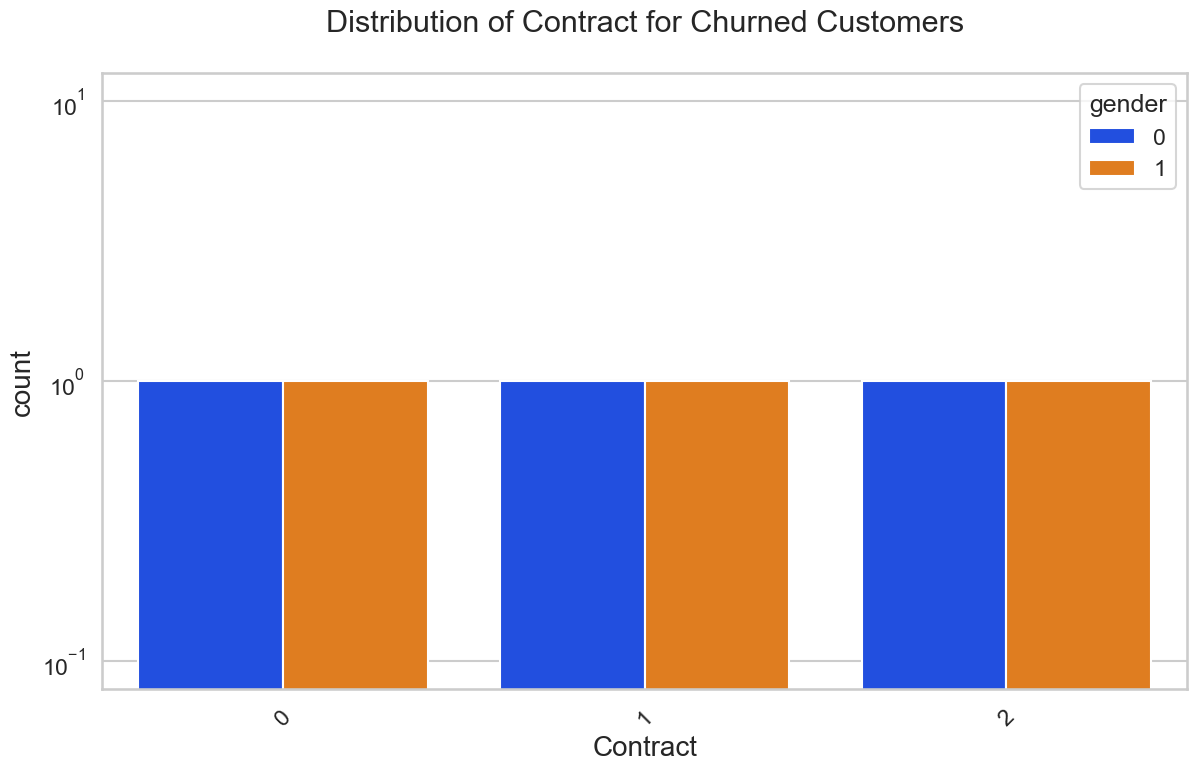

In [44]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

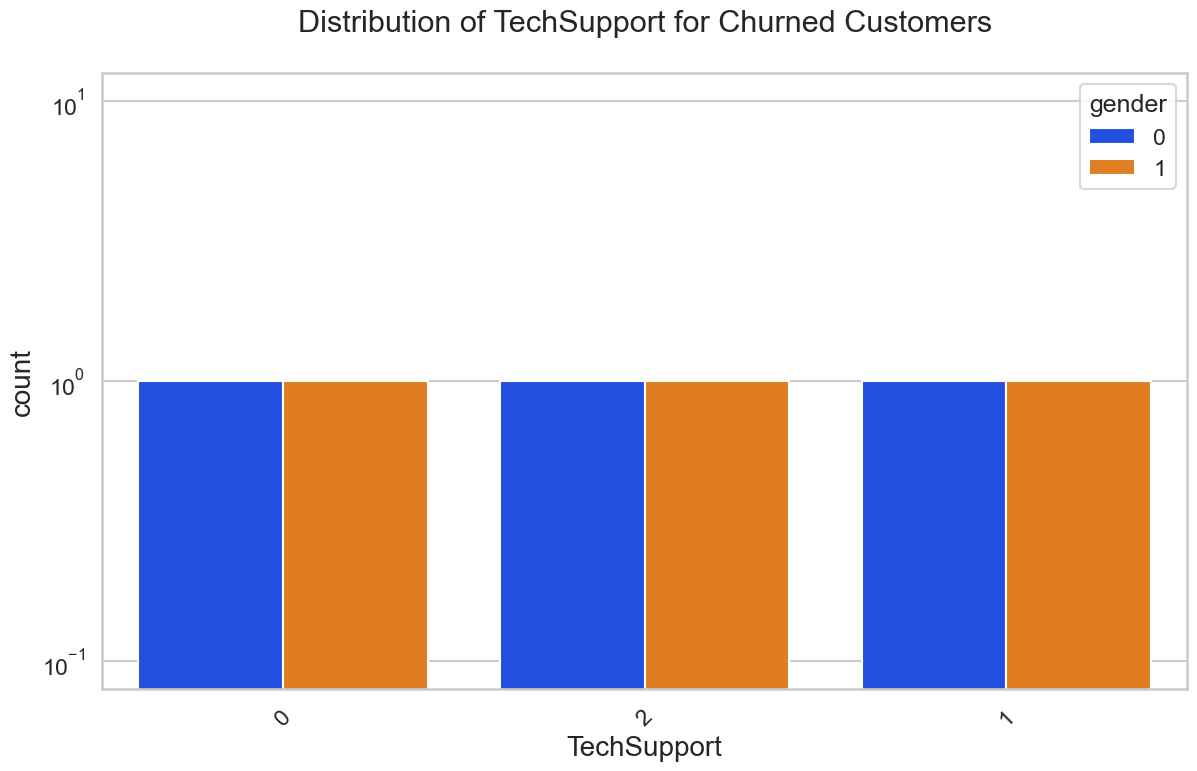

In [45]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

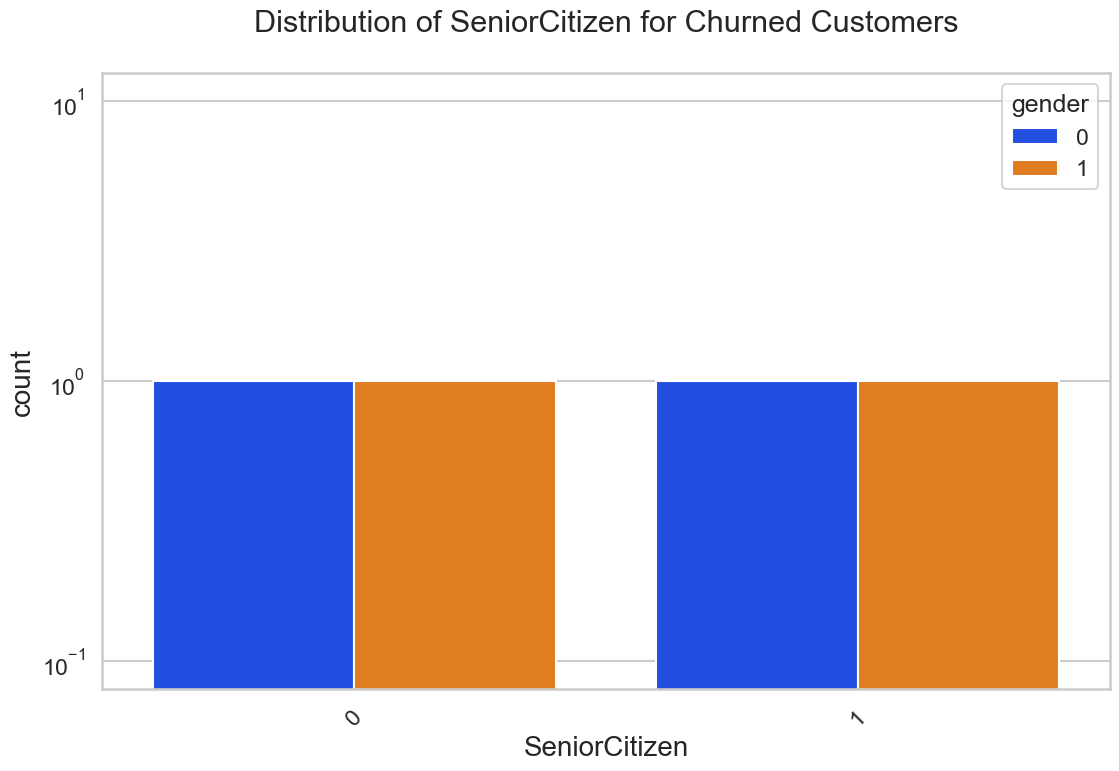

In [46]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [47]:
x=telco_data.drop('Churn',axis=1)
y=telco_data['Churn']

In [48]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,2
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,6
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [49]:
telco_data['Churn'].value_counts()/len(telco_data)

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
print("Training Data Shape")
print(x_train.shape)
print(y_train.shape)

print("Testing Data Shape")
print(x_test.shape)
print(y_test.shape)

Training Data Shape
(5625, 19)
(5625,)
Testing Data Shape
(1407, 19)
(1407,)


In [52]:
print(y_test.value_counts())
print(y_train.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64
Churn
0    4130
1    1495
Name: count, dtype: int64


In [53]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [54]:
model_dtc.score(x_test,y_test)

0.7619047619047619

In [55]:
y_pred=model_dtc.predict(x_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [56]:
print(y_test[:10])

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.56      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



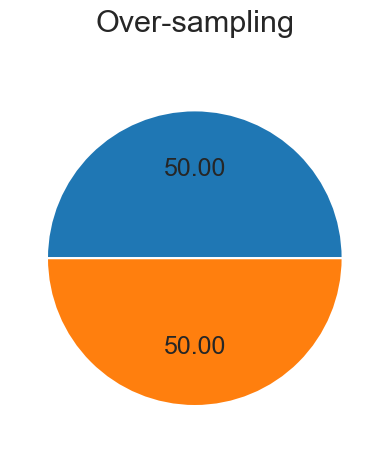

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_ovs,y_ovs=smote.fit_resample(x,y)

fig,oversp=plt.subplots()
oversp.pie(y_ovs.value_counts(),autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()

In [59]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_ovs,y_ovs,test_size=0.2,random_state=42)

In [60]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=1000)

In [61]:
model_lr.fit(xr_train,yr_train)

c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [62]:
y_pred=model_lr.predict(xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [63]:
model_lr.score(xr_test,yr_test)

0.8005808325266215

In [64]:
print(classification_report(yr_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1037
           1       0.78      0.83      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,y_pred)

array([[797, 240],
       [172, 857]], dtype=int64)

In [66]:
# Decision Tree Classifier
model_dtc.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
y_pred=model_dtc.predict(xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [68]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [69]:
model_dtc.score(xr_test,yr_test)

0.8020329138431752

In [70]:
print(classification_report(yr_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1037
           1       0.78      0.84      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [71]:
confusion_matrix(yr_test,y_pred)

array([[795, 242],
       [167, 862]], dtype=int64)

In [72]:
# Random Forest claassifier
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(n_estimators=100,random_state=100,max_depth=6,min_samples_leaf=8,class_weight='balanced')
model_rfc.fit(xr_train,yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [73]:
y_pred=model_rfc.predict(xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [74]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [75]:
model_rfc.score(xr_test,yr_test)

0.8218780251694094

In [76]:
print(classification_report(yr_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1037
           1       0.79      0.87      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.83      0.82      0.82      2066
weighted avg       0.83      0.82      0.82      2066



In [77]:
confusion_matrix(yr_test,y_pred)

array([[799, 238],
       [130, 899]], dtype=int64)

In [78]:
# ADABoost Classifier
from sklearn.ensemble import AdaBoostClassifier
model_abc=AdaBoostClassifier(n_estimators=100)
model_abc.fit(xr_train,yr_train)

AdaBoostClassifier(n_estimators=100)

In [79]:
y_pred=model_abc.predict(xr_test)

In [80]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       941
           1       0.86      0.79      0.83      1125

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [81]:
confusion_matrix(yr_test,y_pred)

array([[802, 235],
       [139, 890]], dtype=int64)

In [82]:
# Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc.fit(xr_train,yr_train)

GradientBoostingClassifier()

In [83]:
y_pred_gbc=model_gbc.predict(xr_test)
y_pred_gbc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [84]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [85]:
print(classification_report(yr_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1037
           1       0.81      0.87      0.84      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [86]:
confusion_matrix(yr_test,y_pred_gbc)

array([[826, 211],
       [134, 895]], dtype=int64)

In [87]:
# XGB Classifier
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(xr_train,yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [88]:
y_pred_xgb=model_xgb.predict(xr_test)
y_pred_xgb[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [89]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [90]:
print(classification_report(yr_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1037
           1       0.83      0.84      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [91]:
confusion_matrix(yr_test,y_pred_xgb)

array([[863, 174],
       [163, 866]], dtype=int64)

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

model=GradientBoostingClassifier()
param_dist={
    'learning_rate': [0.1,0.5,1.0],
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'min_samples_split': [2,5,10]
}
random_search=RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=5,cv=10,scoring='accuracy',random_state=42)

start_time=time.time()
random_search.fit(xr_train,yr_train)
end_time=time.time()

total_time=end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

best_params=random_search.best_params_
print("Best parameters:",best_params)

RandomizedSearchCV took 123.28 seconds to complete.
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.1}


In [93]:
# Final model
from sklearn.ensemble import GradientBoostingClassifier
best_params={
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 7,
    'learning_rate': 0.1
}

final_gb_classifier=GradientBoostingClassifier(**best_params)
final_gb_classifier.fit(xr_train,yr_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=5)

In [94]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(final_gb_classifier,xr_train,yr_train,cv=10,scoring='accuracy')

print("Cross-validation scores:",cv_score)
print("Mean CV score:",cv_score.mean())

Cross-validation scores: [0.83050847 0.86803874 0.83898305 0.84745763 0.84745763 0.84503632
 0.82566586 0.83171913 0.83535109 0.86924939]
Mean CV score: 0.8439467312348669


In [95]:
y_pred=final_gb_classifier.predict(xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [96]:
yr_test[:10]

4139    1
1692    0
2692    0
7704    1
321     0
9752    1
39      1
3813    0
7396    1
2613    0
Name: Churn, dtype: int64

In [97]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1014
           1       0.85      0.83      0.84      1052

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [98]:
confusion_matrix(y_pred,yr_test)

array([[856, 158],
       [181, 871]], dtype=int64)

In [99]:
import os
import pickle
from sklearn.ensemble import GradientBoostingClassifier

os.chdir(r"C:\Users\abhin\FSDS_Projects\Customer_churn_project")

best_params={
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 7,
    'learning_rate': 0.1}

final_gb_classifier=GradientBoostingClassifier(**best_params)
final_gb_classifier.fit(x_train,y_train)

with open('final_gb_classifier.pkl','wb') as file:
    pickle.dump(final_gb_classifier,file)
    
with open('final_gb_classifier.pkl','rb') as file:
    loaded_model=pickle.load(file)

In [100]:
import pickle

with open('final_gb_classifier.pkl','rb') as file:
    loaded_model=pickle.load(file)
    
    your_features=pd.DataFrame({
        'gender': [1,0,0,0,0],
        'SeniorCitizen':[0,0,0,0,0],
        'Partner': [0,0,0,1,1],
        'Dependents': [0,0,0,0,1],
        'PhoneService': [1,0,1,1,1],
        'MultipleLines': [0,0,0,2,2],
        'InternetService': [1,0,1,1,0],
        'OnlineSecurity': [0,0,0,2,2],
        'OnlineBackup': [0,0,1,2,2],
        'DeviceProtection': [0,0,0,0,2],
        'TechSupport': [0,0,0,2,2],
        'StreamingTV': [0,1,0,0,0],
        'StreamingMovies': [0,1,0,0,0],
        'Contract': [2,0,0,1,2],
        'PaperlessBilling': [0,1,0,0,0],
        'PaymentMethod': [1,1,1,0,0],
        'MonthlyCharges': [90.407734,58.273891,74.379767,108.55,64.35],
        'TotalCharges': [707.535237,3264.466697,1146.937795,5610.7,1558.65],
        'tenure_group': [0,4,1,4,2]
    })
    
    predictions=loaded_model.predict(your_features)
    print("Predictions:",predictions)

Predictions: [0 0 0 0 0]
